In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import spacy
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Real=pd.read_csv('True.csv', encoding='Latin-1',on_bad_lines='skip')

In [4]:
Fake=pd.read_csv('Fake.csv', encoding='Latin-1',on_bad_lines='skip')

In [5]:
Real.tail()

,title,text,subject,date
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21410,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#Giving labels to both the data sets

In [8]:
Fake['Label']=0
Real['Label']=1

In [9]:
##Joining both data sets

In [10]:
news=pd.concat([Fake,Real],axis=0)

In [11]:
news

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# EDA

In [12]:
##removing duplicates

In [13]:
news.duplicated().sum()

209

In [14]:
news.drop_duplicates(inplace=True)

In [15]:
#removing null values

In [16]:
news.isna().sum()

title      0
text       2
subject    2
date       3
Label      0
dtype: int64

In [17]:
news.dropna(inplace=True)

In [18]:
## we require only text & label  column , so keeping only text & label column

In [19]:
news_text=news[['text','Label']]

In [20]:
news_text

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21406,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21407,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21408,MINSK (Reuters) - In the shadow of disused Sov...,1
21409,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [21]:
##shuffle the data

In [22]:
news_text=news_text.sample(frac=1).reset_index()

In [23]:
news_text.head()

,index,text,Label
0,12670,"SURENDRANAGAR, India (Reuters) - Tens of thous...",1
1,2703,Donald Trump is either really desperate to mak...,0
2,13002,BUDAPEST (Reuters) - A Hungarian European Parl...,1
3,6491,While there has never been a confirmed instanc...,0
4,2465,BERLIN (Reuters) - Europe must be prepared to ...,1


In [24]:
## removing unnecessary col

In [25]:
news_text.drop(['index'],axis=1,inplace=True)

In [26]:
news_text.head(10)

,text,Label
0,"SURENDRANAGAR, India (Reuters) - Tens of thous...",1
1,Donald Trump is either really desperate to mak...,0
2,BUDAPEST (Reuters) - A Hungarian European Parl...,1
3,While there has never been a confirmed instanc...,0
4,BERLIN (Reuters) - Europe must be prepared to ...,1
5,***WARNING***This video will make your blood b...,0
6,,0
7,Confusing different policies and different ide...,0
8,With the 9th Circuit Court ruling against the ...,0
9,The media has been talking all day about Trump...,0


In [27]:
##visualization

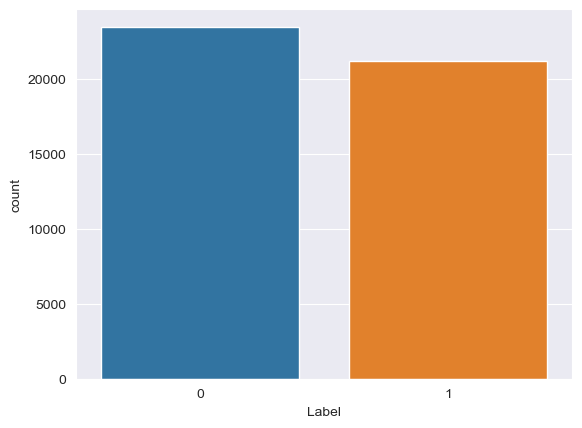

In [28]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x ='Label', data = news_text);

In [29]:
##here we can see we have a balanced data

# DATA PREPROCESSING

In [30]:
def wordopt(text):
    
    #convert to lower case
    text=text.lower()
    
    #remove URLs
    text=re.sub(r"httml?://\S+|www.\S+",'',text) 
    
    #remove HTML tags
    text=re.sub(r'<.*?>','',text)
        
    #remove Punctuations
    text=re.sub(r'[^\w\s]', '', text)
    
    #remove digits
    text=re.sub(r'\d', '', text)
    
    #remove newline character
    text=re.sub(r'\n', ' ', text)
    
    #remove all the special characters
    text = re.sub('[\W_]+',' ',text)
    
    return text
    
    

In [31]:
news_text['text']=news_text['text'].apply(wordopt)

In [32]:
news_text['text']

0        surendranagar india reuters tens of thousands ...
1        donald trump is either really desperate to mak...
2        budapest reuters a hungarian european parliame...
3        while there has never been a confirmed instanc...
4        berlin reuters europe must be prepared to resp...
                               ...                        
44656    the video below is one of the highlights from ...
44657    the glowing review we gave to miss usa kara mc...
44658    washington reuters two us senators said late o...
44659    paris reuters france accused the syrian govern...
44660                                           brave guy 
Name: text, Length: 44661, dtype: object

In [33]:
#Removing stopwords,tokenizing,lemmatizing or stemming

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [35]:
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
    # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
news_text['text']=news_text['text'].apply(preprocess_text)

In [37]:
news_text

,text,Label
0,surendranagar india reuter ten thousand indian...,1
1,donald trump either realli desper make sound l...,0
2,budapest reuter hungarian european parliament ...,1
3,never confirm instanc transgend peopl child pr...,0
4,berlin reuter europ must prepar respond kind u...,1
...,...,...
44656,video one highlight protest last year protest ...,0
44657,glow review gave miss usa kara mccullough must...,0
44658,washington reuter two us senat said late wedne...,1
44659,pari reuter franc accus syrian govern wednesda...,1


In [38]:
##visualizing texts

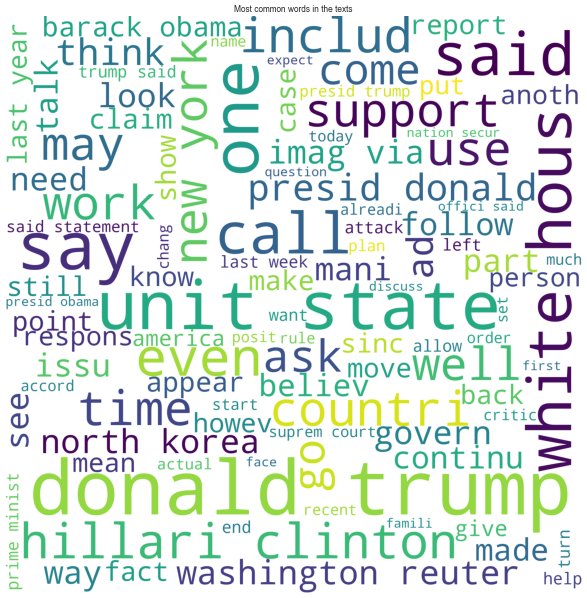

In [39]:
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(news_text.text.tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the texts")
plt.axis('off')
plt.show()

In [40]:
## TFIDF Vectorization

In [41]:
## First let us devide data into train & test 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train = news_text['text']
y_train= news_text['Label']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25)

In [45]:
x_train.shape

(33495,)

In [46]:
x_test.shape

(11166,)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# Split the dataset into train and test sets
x = news_text['text']
y = news_text['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
x_train_v = vectorizer.fit_transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
#Model Training and Evaluation

In [51]:
NBModel = MultinomialNB() 

In [52]:
NBModel.fit(x_train_v, y_train)

MultinomialNB()

In [53]:
y_pred=NBModel.predict(x_test_v)

In [54]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9408933169148103
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4656
           1       0.94      0.94      0.94      4277

    accuracy                           0.94      8933
   macro avg       0.94      0.94      0.94      8933
weighted avg       0.94      0.94      0.94      8933

Confusion Matrix:
[[4382  274]
 [ 254 4023]]


In [55]:
##Sentiment distribution 

In [56]:
##Confusion matrix

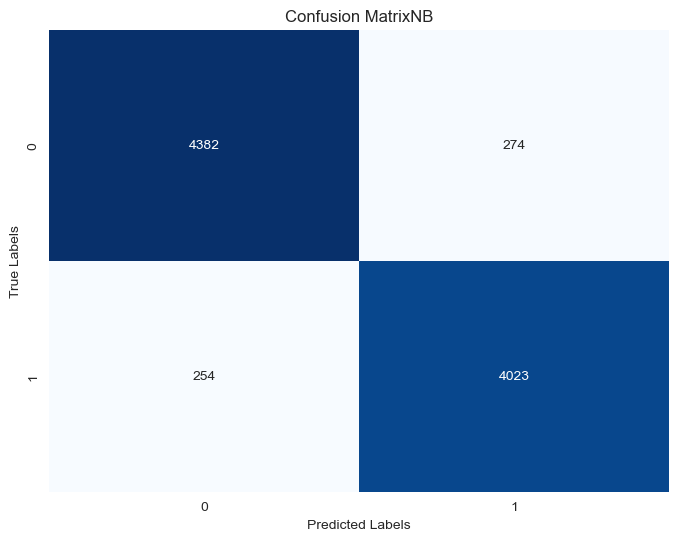

In [57]:
# Create a confusion matrix
cmNB = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmNB, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion MatrixNB')
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#Creating and training the SVM model
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
RFModel.fit(x_train_v, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred= RFModel.predict(x_test_v)

In [62]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9877980521661256
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4656
           1       0.99      0.99      0.99      4277

    accuracy                           0.99      8933
   macro avg       0.99      0.99      0.99      8933
weighted avg       0.99      0.99      0.99      8933

Confusion Matrix:
[[4606   50]
 [  59 4218]]


In [63]:
##Sentiment distribution 

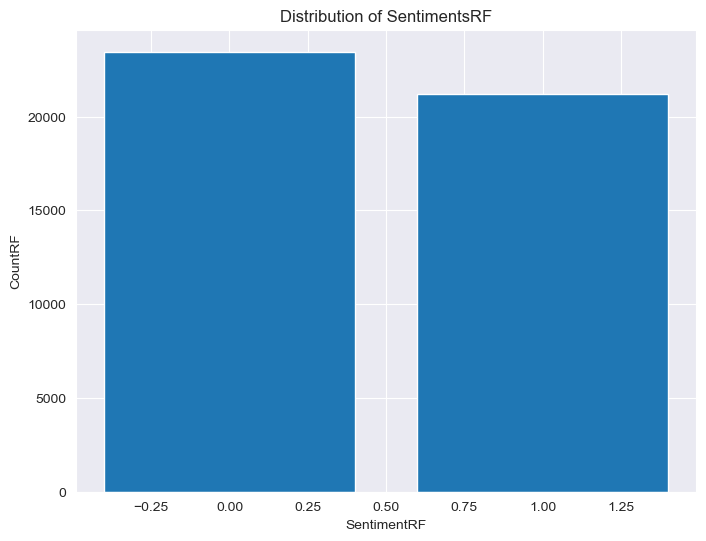

In [64]:
sentiment_countsRF = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsRF.index, sentiment_countsRF.values)
plt.xlabel('SentimentRF')
plt.ylabel('CountRF')
plt.title('Distribution of SentimentsRF')
plt.show()

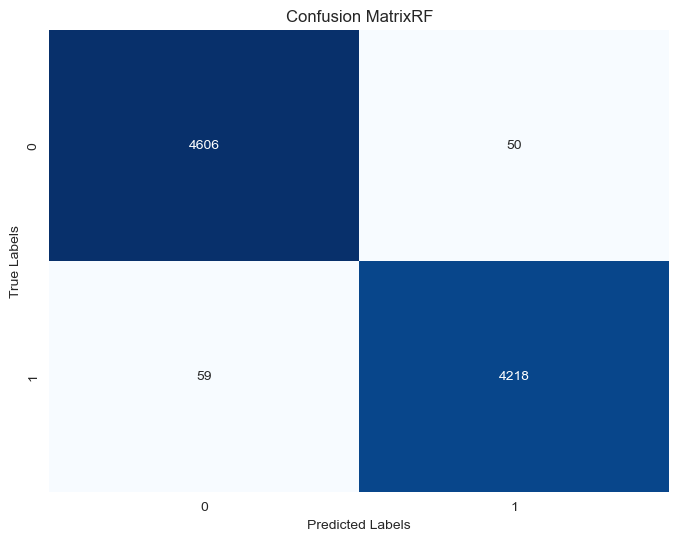

In [65]:
# Create a confusion matrix
cmRF = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion MatrixRF')
plt.show()

In [66]:
from sklearn.svm import SVC

In [67]:
SVMModel = SVC(random_state=42)

In [68]:
SVMModel.fit(x_train_v, y_train)

SVC(random_state=42)

In [69]:
#Making predictions on the testing set
y_predSVC = SVMModel.predict(x_test_v)

In [70]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9877980521661256
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4656
           1       0.99      0.99      0.99      4277

    accuracy                           0.99      8933
   macro avg       0.99      0.99      0.99      8933
weighted avg       0.99      0.99      0.99      8933

Confusion Matrix:
[[4606   50]
 [  59 4218]]


In [71]:
##Sentiment distribution 

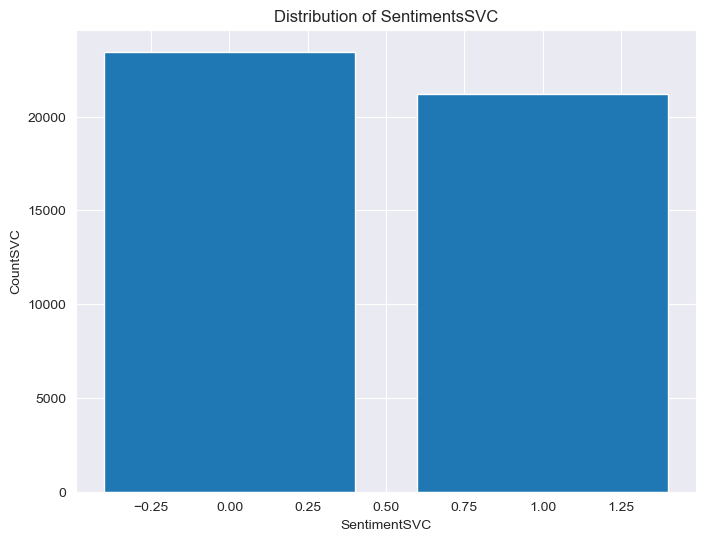

In [72]:
sentiment_countsSVC = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsSVC.index, sentiment_countsSVC.values)
plt.xlabel('SentimentSVC')
plt.ylabel('CountSVC')
plt.title('Distribution of SentimentsSVC')
plt.show()

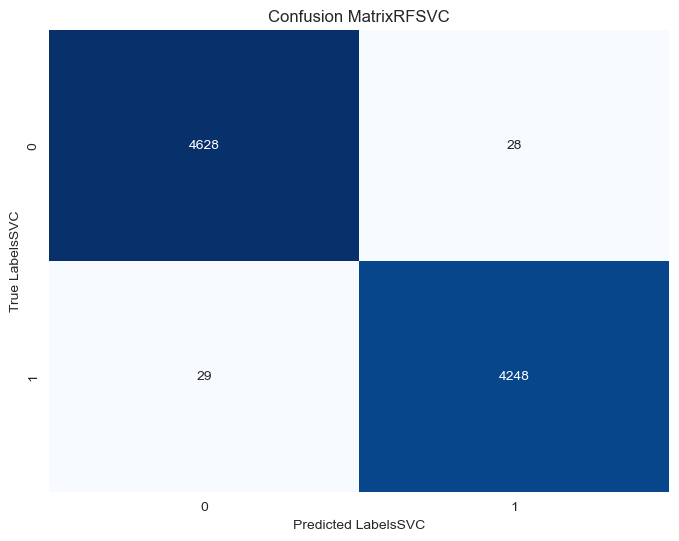

In [73]:
# Create a confusion matrix
cmSVC = confusion_matrix(y_test, y_predSVC)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmSVC, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted LabelsSVC')
plt.ylabel('True LabelsSVC')
plt.title('Confusion MatrixRFSVC')
plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
# Split the dataset into train and test sets
x1 = news_text['text']
y1 = news_text['Label']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
x_train_v1 = vectorizer.fit_transform(x_train1)
x_test_v1 = vectorizer.transform(x_test1)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
LR=LogisticRegression()

In [78]:
LR.fit(x_train_v1,y_train1)

LogisticRegression()

In [79]:
# Make predictions on the test set:
y_pred1=LR.predict(x_test_v1)

In [80]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test1, y_pred1)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9958580544050151
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4656
           1       1.00      0.99      1.00      4277

    accuracy                           1.00      8933
   macro avg       1.00      1.00      1.00      8933
weighted avg       1.00      1.00      1.00      8933

Confusion Matrix:
[[4641   15]
 [  22 4255]]


In [81]:
##Sentiment distribution 

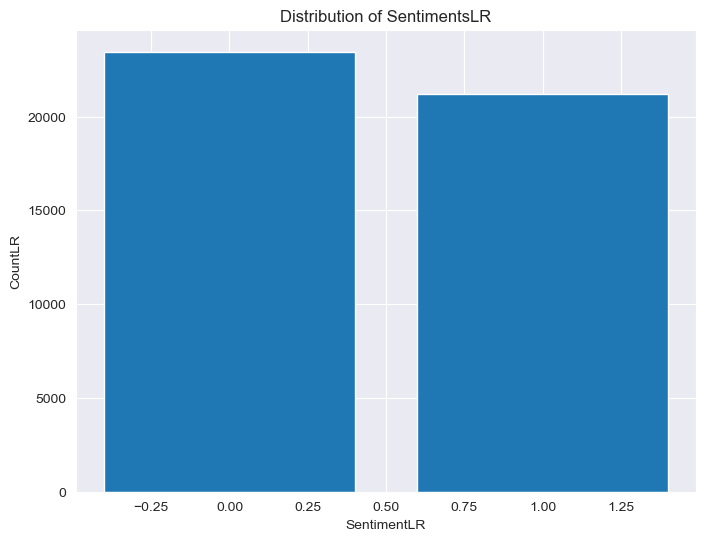

In [82]:
sentiment_countsLR = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsLR.index, sentiment_countsLR.values)
plt.xlabel('SentimentLR')
plt.ylabel('CountLR')
plt.title('Distribution of SentimentsLR')
plt.show()

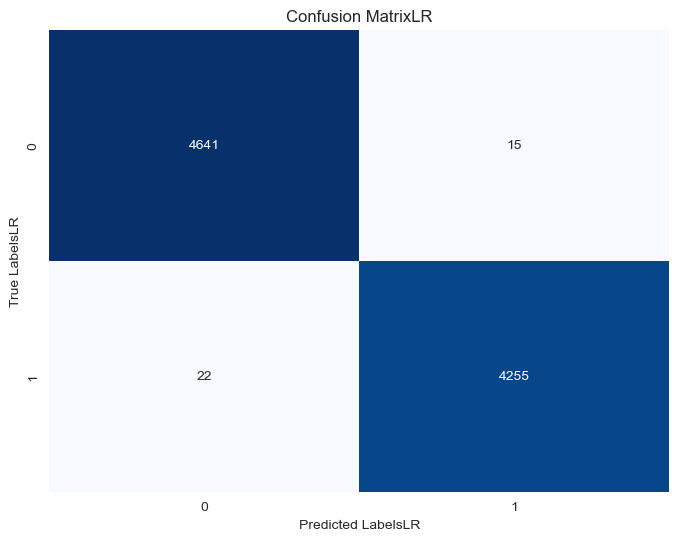

In [83]:
# Create a confusion matrix
cmLR = confusion_matrix(y_test1, y_pred1)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmLR, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted LabelsLR')
plt.ylabel('True LabelsLR')
plt.title('Confusion MatrixLR')
plt.show()

In [84]:
#deployment

In [85]:
def fake_news_data(news):
    input_data=[news]
    vectorized_input_data=vectorizer.transform(input_data)
    prediction=LR.predict(vectorized_input_data)
    print(prediction)
        

In [86]:
fake_news_data('On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA pic.twitter.com/XtZW5PdU2b  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017He didn t stop there.BREAKING NEWS! When LYING LIB MEDIA makes up FAKE NEWS to smear me, the ANTIDOTE is go right at them. Punch them in the nose & MAKE THEM TASTE THEIR OWN BLOOD. Nothing gets a bully like LYING LIB MEDIA S attention better than to give them a taste of their own blood #neverbackdown pic.twitter.com/T2NY2psHCR  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017The internet called him out.This is your local newspaper and that search warrant isn t fake, and just because the chose not to file charges at the time doesn t mean they won t! Especially if you continue to lie. Months after decision not to charge Clarke, email search warrant filed https://t.co/zcbyc4Wp5b  KeithLeBlanc (@KeithLeBlanc63) December 30, 2017I just hope the rest of the Village People aren t implicated.  Kirk Ketchum (@kirkketchum) December 30, 2017Slaw, baked potatoes, or French fries? pic.twitter.com/fWfXsZupxy  ALT- Immigration   (@ALT_uscis) December 30, 2017pic.twitter.com/ymsOBLjfxU  Pendulum Swinger (@PendulumSwngr) December 30, 2017you called your police friends to stand up for you when someone made fun of your hat  Chris Jackson (@ChrisCJackson) December 30, 2017Is it me, with this masterful pshop of your hat, which I seem to never tire of. I think it s the steely resolve in your one visible eye pic.twitter.com/dWr5k8ZEZV  Chris Mohney (@chrismohney) December 30, 2017Are you indicating with your fingers how many people died in your jail? I think you re a few fingers short, dipshit  Ike Barinholtz (@ikebarinholtz) December 30, 2017ROFL. Internet tough guy with fake flair. pic.twitter.com/ulCFddhkdy  KellMeCrazy (@Kel_MoonFace) December 30, 2017You re so edgy, buddy.  Mrs. SMH (@MRSSMH2) December 30, 2017Is his break over at Applebees?  Aaron (@feltrrr2) December 30, 2017Are you trying to earn your  still relevant  badge?  CircusRebel (@CircusDrew) December 30, 2017make sure to hydrate, drink lots of water. It s rumored that prisoners can be denied water by prison officials.  Robert Klinc (@RobertKlinc1) December 30, 2017Terrill Thomas, the 38-year-old black man who died of thirst in Clarke s Milwaukee County Jail cell this April, was a victim of homicide. We just thought we should point that out. It can t be repeated enough.Photo by Spencer Platt/Getty Images')

[0]


In [87]:
fake_news_data('WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumps administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrations request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODs study and will continue to defend the presidents lawful authority in District Court in the meantime, the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: As mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards. Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal great news. Im hoping it means the government has come to see that there is no way to justify a ban and that its not good for the military or our country, Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamas policy of accepting them. Trump said on Twitter at the time that the military cannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail. Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumps ban while legal challenges to the Republican presidents policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicants sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept some individuals who are not medically fit for service. The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumps defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidents ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity')

[1]
